In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
file_path = 'data/'+'oy_bin_stair_auditory_dur_estimate_bin_stair_2025-01-26_14h23.52.919.csv'
#_auditory_dur_estimate_2025-01-26_13h31.27.315.csv' again const
#_auditory_dur_estimate_2025-01-26_01h24.23.874.csv' method of constant
#_auditory_dur_estimate_2025-01-25_23h28.04.509.csv'
#_auditory_dur_estimate_2025-01-22_20h53.18.927.csv'
#_auditory_dur_estimate_2025-01-22_16h43.58.121.csv'
data = pd.read_csv(file_path)
data['chose_test'] = (data['responses'] == data['order']).astype(int)
data

,Unnamed: 0,standard_dur,rise_dur,order,pre_dur,post_dur,isi_dur,trial_num,total_audio_dur,delta_dur_percents,...,test_dur_s,intensities,current_stair,responses,is_correct,response_rts,stair_num_reversal,stair_is_reversal,response_keys,chose_test
0,0,0.5,3.5,2,0.367618,0.392309,0.347425,0,2.132290,0.05000,...,0.52500,6,3D1Ub,1.0,False,3.314271,0,False,left,0
1,1,0.5,0.2,2,0.409281,0.330657,0.721637,1,2.436531,-0.05000,...,0.47500,6,3U1D,2.0,False,2.124738,0,False,right,1
2,2,0.5,0.2,1,0.360823,0.387616,0.694851,2,2.318231,-0.25000,...,0.37500,6,3U1D,2.0,True,0.807501,0,False,right,0
3,3,0.5,0.2,2,0.437914,0.406557,0.736294,3,2.980726,0.80000,...,0.90000,6,lapse_rate,2.0,True,0.277181,0,False,right,1
4,4,0.5,3.5,1,0.415999,0.349796,0.444285,4,2.610045,0.80000,...,0.90000,6,lapse_rate,1.0,True,0.184129,0,False,left,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,0.5,0.2,1,0.355002,0.399698,0.492925,219,2.405578,0.31600,...,0.65800,6,3D1U,2.0,False,0.941972,10,False,right,0
220,220,0.5,0.2,2,0.449454,0.303169,0.558250,220,2.513696,0.40578,...,0.70289,6,3D1U,2.0,True,0.792304,10,False,right,1
221,221,0.5,3.5,1,0.348198,0.401504,0.512368,221,2.172245,-0.17956,...,0.41022,6,3U1Db,1.0,False,1.632145,11,False,left,1
222,222,0.5,0.2,1,0.373856,0.517199,0.400353,222,2.494263,0.40578,...,0.70289,6,3D1U,1.0,True,0.053744,10,False,left,1


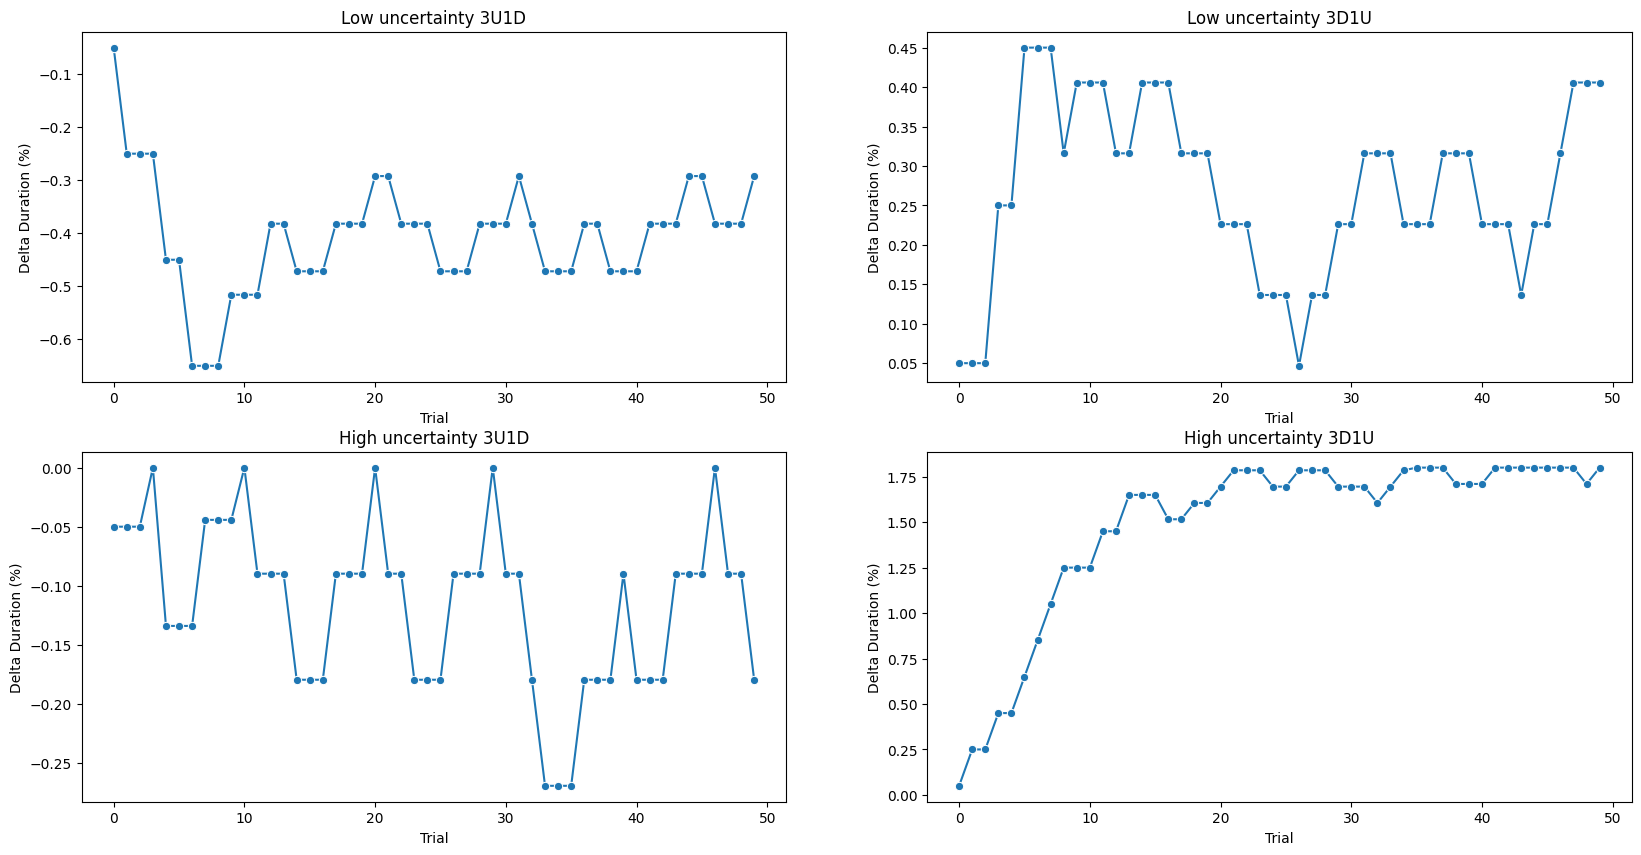

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
data_standard = data[data['standard_dur'] == 1].reset_index(drop=True)
#data=data[data['rise_dur'] == 0.2].reset_index(drop=True)
# Define the stair types and titles
stair_types = ['3U1D', '3D1U', '3U1Db', '3D1Ub', 'lapse_rate']
#titles = ['3 Up 1 Down', '3 Down 1 Up',"High uncertainty 3U1D", np.unique(data['rise_dur'])[1],]

titles = ['Low uncertainty 3U1D', 'Low uncertainty 3D1U',"High uncertainty 3U1D", "High uncertainty 3D1U"]

# Plot each stair type in a subplot
for ax, stair_type, title in zip(axs.flatten(), stair_types, titles):
    df_stair = data[data['current_stair'] == stair_type].reset_index(drop=True)
    sns.lineplot(x=df_stair.index, y='delta_dur_percents', data=df_stair, marker='o', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Delta Duration (%)')
    #ax.set_ylim(-1, 1)


In [66]:
a

['3D1U', '3D1Ub', '3U1D', '3U1Db', 'lapse_rate']

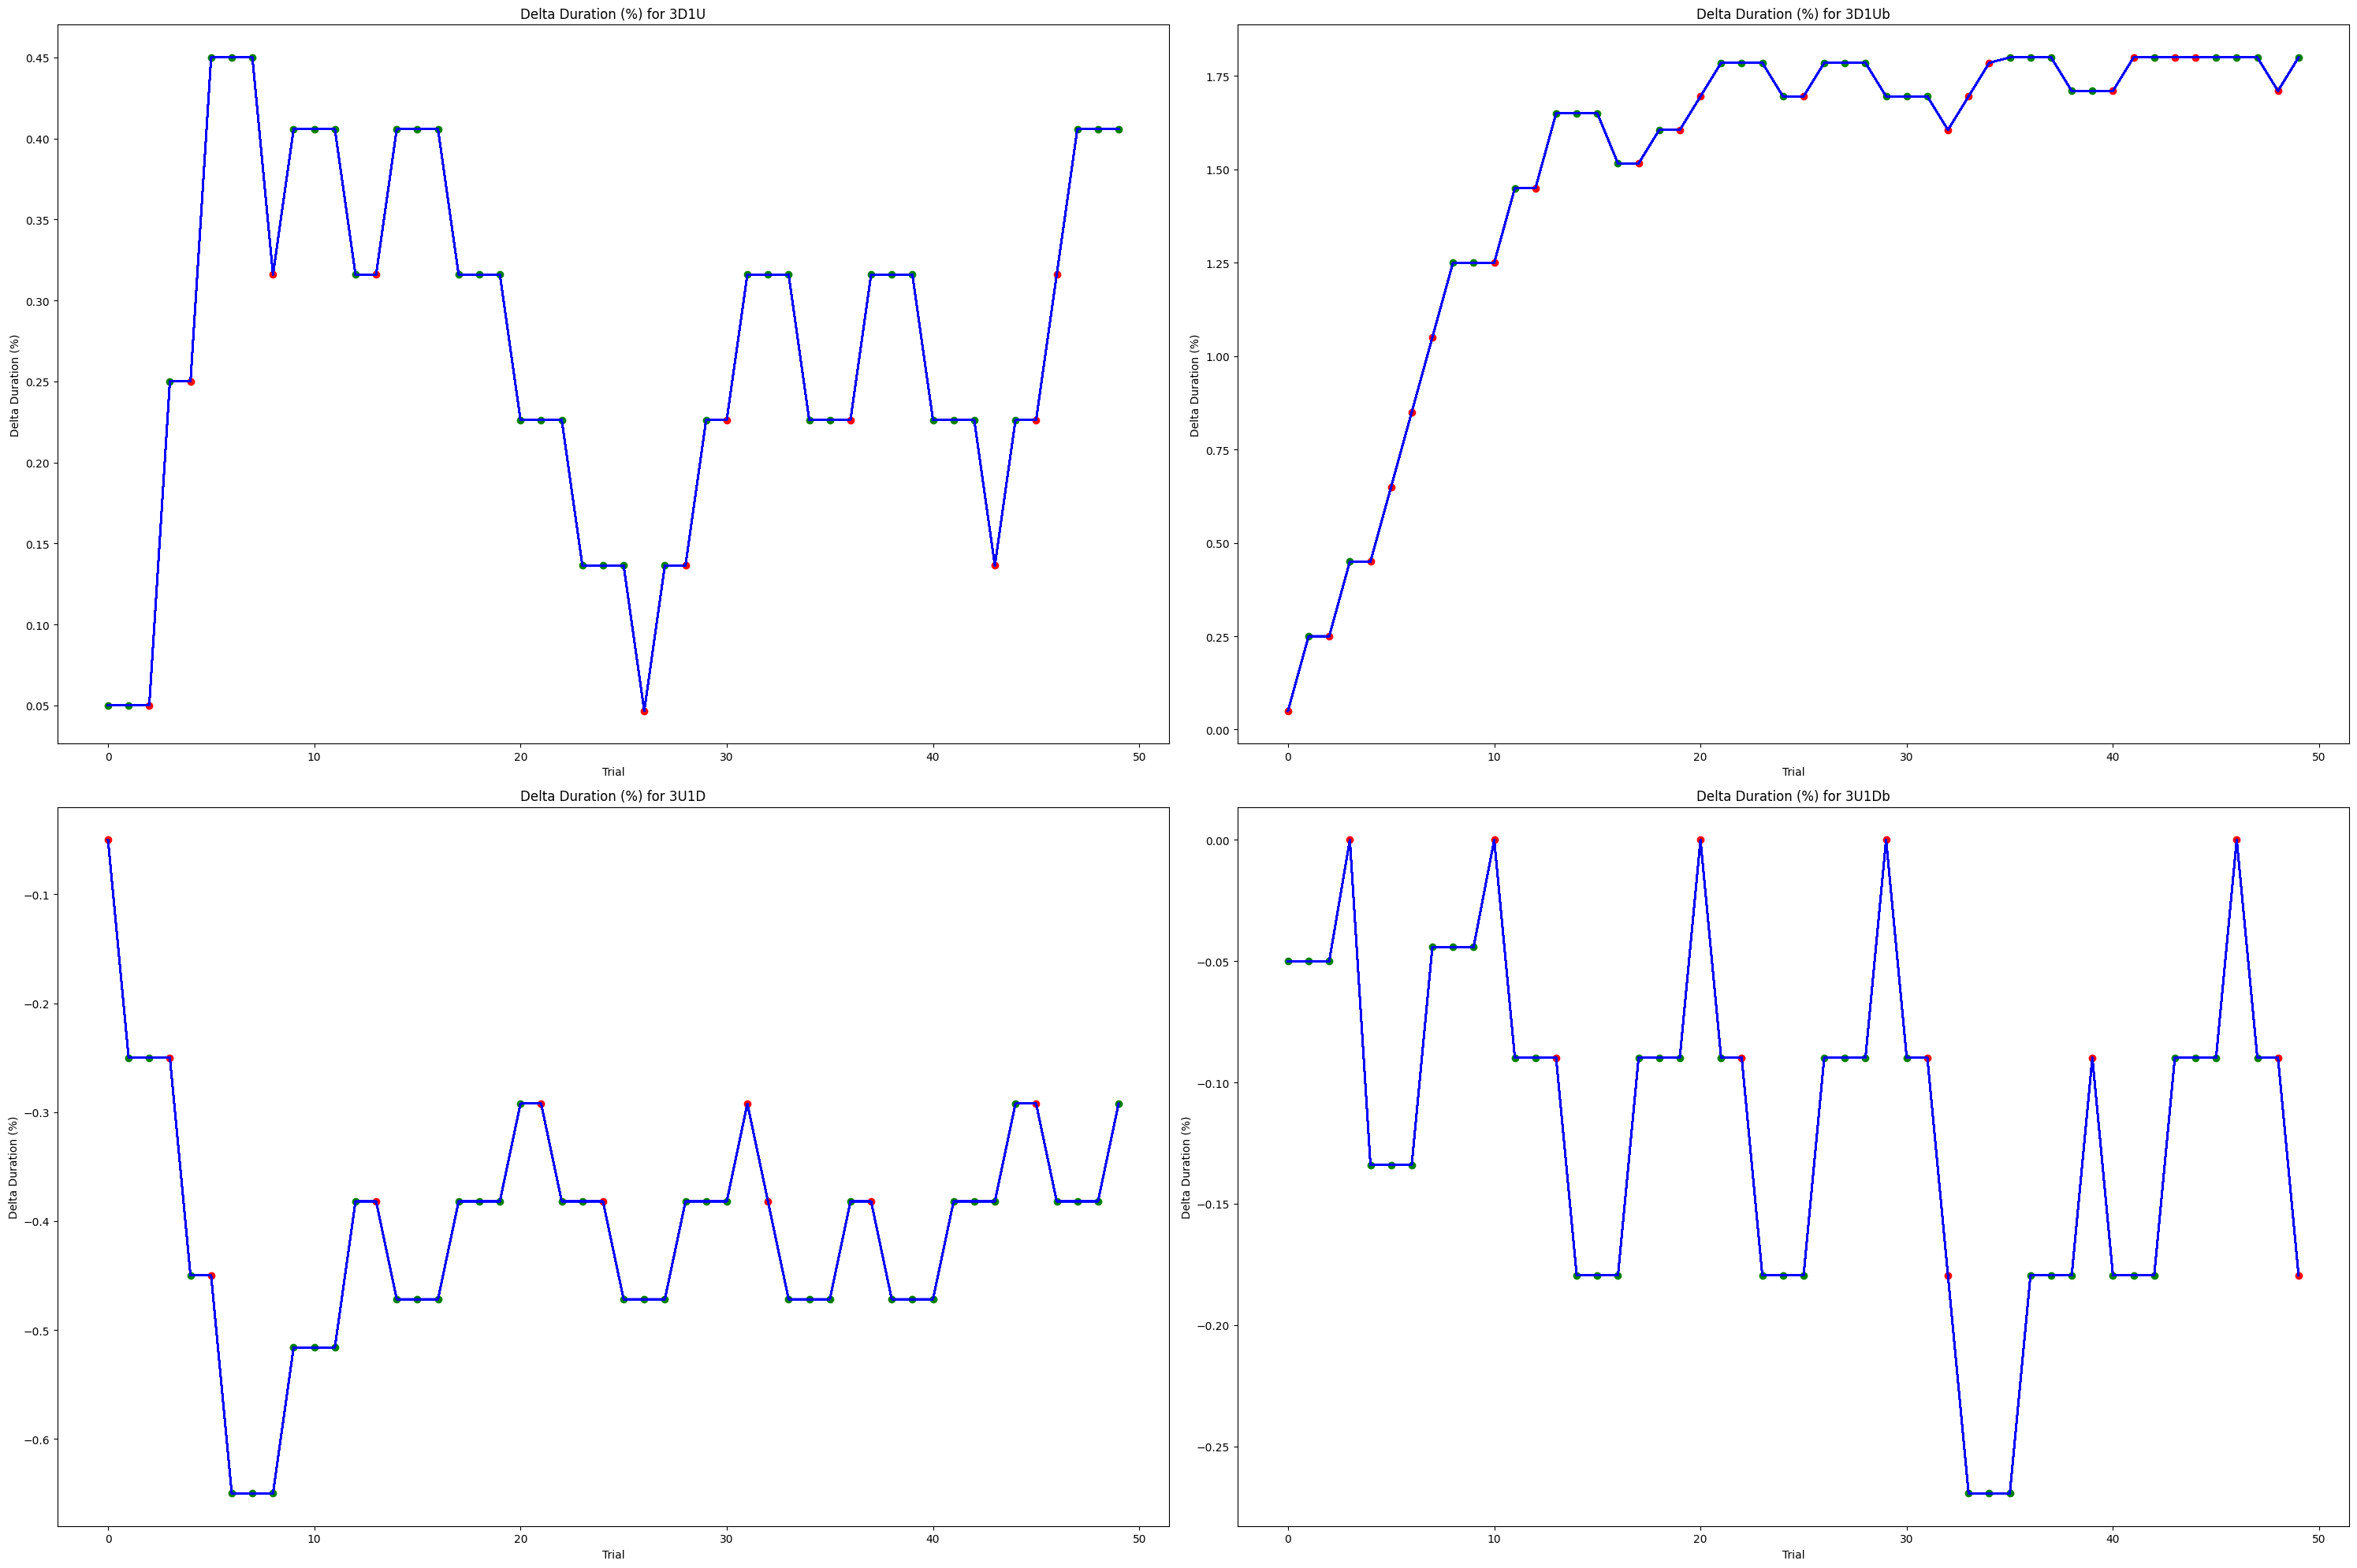

In [ ]:
a=data['current_stair'].unique().tolist()
a.sort()
a=a[:-1]# plot each trial delta dur seperately
plt.figure(figsize=(30,20))
for idx,stair in enumerate(a):
    df = data[data['current_stair'] == stair].reset_index(drop=True)
    plt.subplot(2,2,idx+1)
    for trialN in range(len(df)):
        color = 'green' if df['is_correct'][trialN] == 1 else 'red'
        plt.scatter(trialN, df['delta_dur_percents'][trialN], color=color,)
        plt.plot(df['delta_dur_percents'], color='blue')
        plt.title(f'Delta Duration (%) for {stair}')

        plt.xlabel('Trial')
        plt.ylabel('Delta Duration (%)')
    
plt.tight_layout()
plt.show()



TypeError: 'Axes' object is not subscriptable

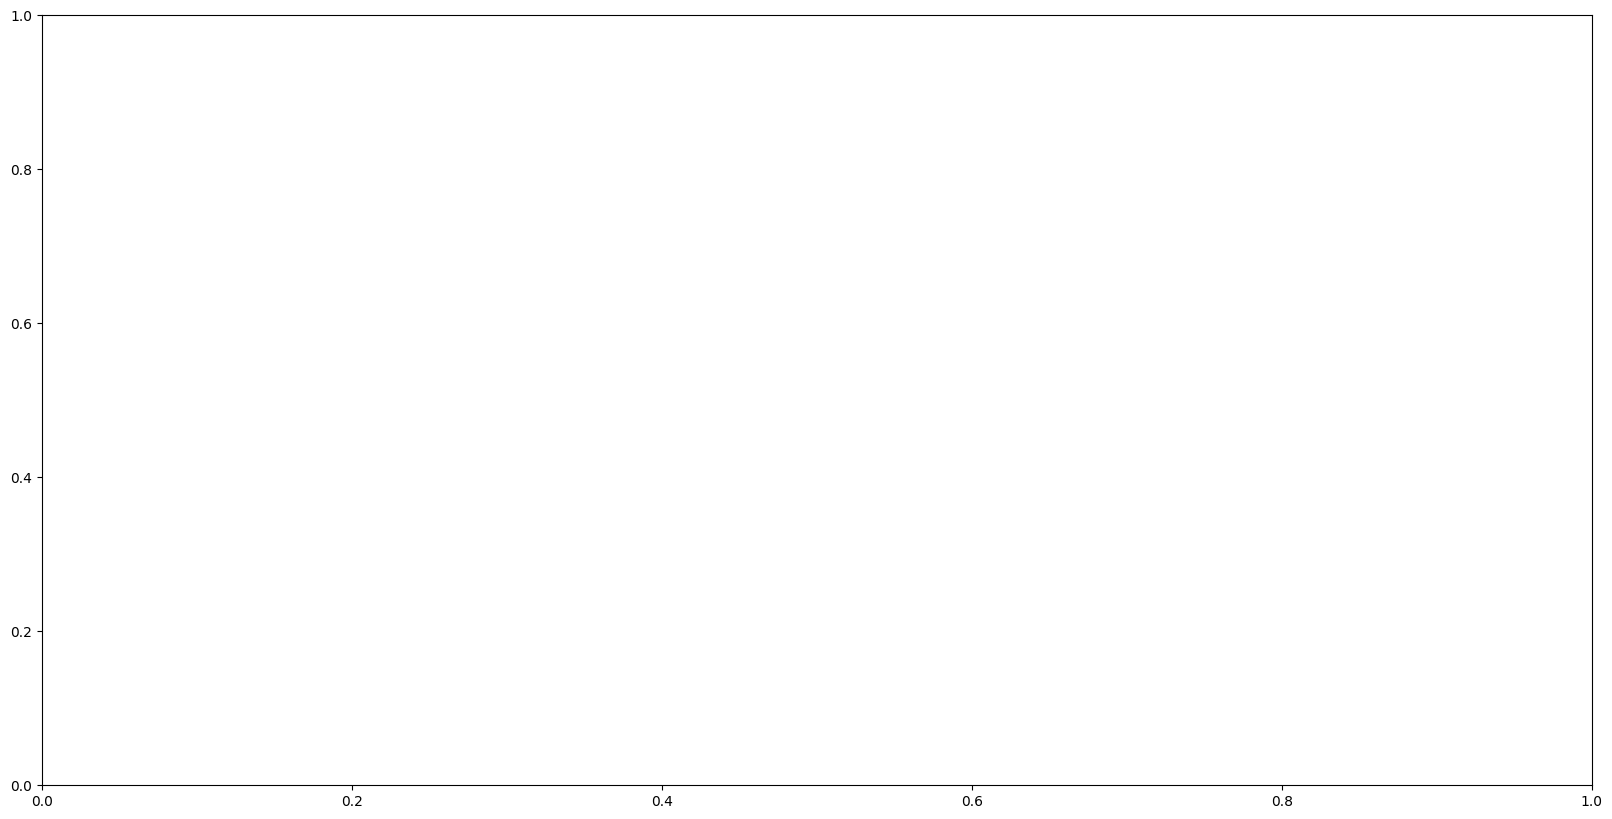

In [5]:
#plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(1,1, figsize=(20, 10))
for trial in np.unique(data['current_stair']):
    df_stair = data[data['current_stair'] == trial].reset_index(drop=True)
    sns.lineplot(x=df_stair.index, y='delta_dur_percents', data=df_stair, marker='o', ax=axs[1, 1])
    axs[1, 1].set_title('All Stair Types')
    axs[1, 1].set_xlabel('Trial')
    axs[1, 1].set_ylabel('Delta Duration (%)')
    #axs[1, 1].set_ylim(-1, 1)
plt.tight_layout()
plt.show()

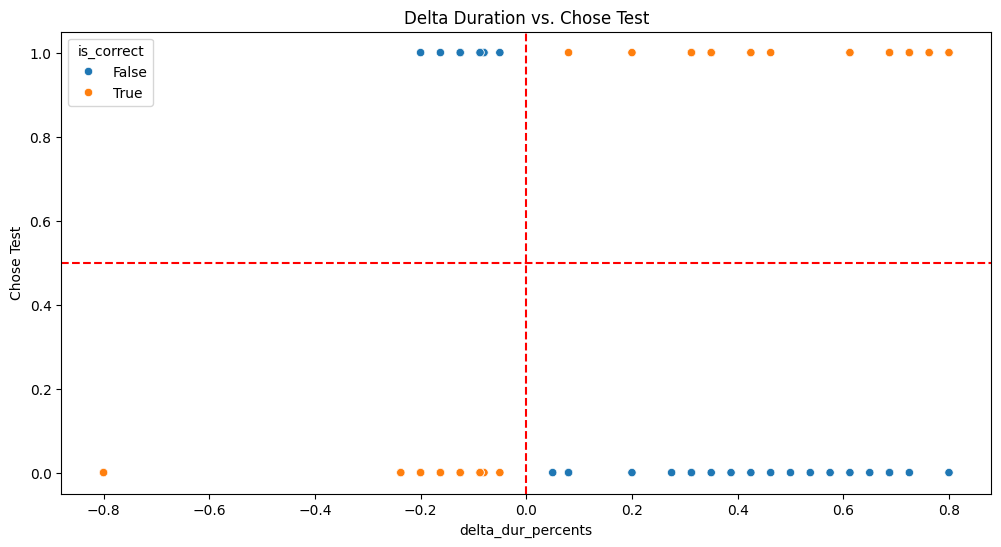

In [35]:
plt.figure(figsize=(12, 6))
data_filtered = data[data['rise_dur'] == 3.5]
#sns.lineplot(x='delta_dur_percents', y='chose_test', data=data_filtered, marker='o')
sns.scatterplot(x='delta_dur_percents', y='chose_test', data=data_filtered, hue='is_correct',) # Vary size by 'is_correct'
plt.title('Delta Duration vs. Chose Test')
#plt.xlabel('Trial')
plt.ylabel('Chose Test')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')

plt.show()

In [12]:
mean_correct_3D1U = round(data[data['current_stair'] == "3D1U"]['is_correct'].mean(),3)
mean_correct_3U1D = round(data[data['current_stair'] == "3U1D"]['is_correct'].mean(),3)
mean_correct_2D1U = round(data[data['current_stair'] == "3D1Ub"]['is_correct'].mean(),3)
mean_correct_2U1D = round(data[data['current_stair'] == "3U1Db"]['is_correct'].mean(),3)

print(f'mean of correct responses for 3D1U trials is {mean_correct_3D1U}')
print(f'mean of correct responses for 3d1ub trials is {mean_correct_2D1U}')
print(f'mean of correct responses for 3U1D trials is {mean_correct_3U1D}')
print(f'mean of correct responses for 3u1db trials is {mean_correct_2U1D}')



mean of correct responses for 3D1U trials is 0.78
mean of correct responses for 3d1ub trials is 0.6
mean of correct responses for 3U1D trials is 0.8
mean of correct responses for 3u1db trials is 0.76
